In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#define a fucntion to create and get the Bollinger Bands
def bollinger_bands(data, window_size = 30):
    rolling_mean = data['Close'].rolling(window=window_size).mean() #Simple moving Average (SMA)
    rolling_std = data['Close'].rolling(window=window_size).std()
    data['UpperBand'] = rolling_mean + (2 * rolling_std)
    data['LowerBand'] = rolling_mean - (2 * rolling_std)
    return data

#define a funtion to create and get the Relative Strength Index (rsi)
def rsi(data, window = 13):
    delta = data['Close'].diff()
    gain = delta.where(delta>0, 0)
    loss = delta.where(delta<0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain / avg_loss
    rsi = 100 - (100/(1+RS))
    data['rsi'] = rsi
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data


#create and get the trading strategy
#buy when the close price goes below the LowerBand and the rsi is less then 30 and I dont have a position (no shares)
#sell when the close price goes Above the UpperBand and the rsi is more than 70 and I have shares
def strategy(data):
    position = 0 #shares
    buy_price = []
    sell_price = []
    for i in range(len(data)):
        if data['Close'][i] <data['LowerBand'][i] and data['rsi'][i] <data['Oversold'][i] and position == 0:
            position = 1
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['rsi'][i] > data['Overbought'][i] and position == 1:
            position = 0
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    return (buy_price, sell_price)
            

#get stock data
def get_stock_data(ticker: str, days: int) -> pd.DataFrame:
    """
    Fetches the Open, High, Low, Close, Adjusted Close, and Volume data for a given stock ticker and number of days.
    :param ticker: The stock ticker symbol.
    :param days: The number of days of historical data to fetch.
    :return: A pandas DataFrame containing the stock data.
    """
    # Calculate the start date based on the number of days
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.Timedelta(days=days)
    
    # Fetch the data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    return stock_data



[*********************100%%**********************]  1 of 1 completed
C:\Users\hatfi\AppData\Local\Temp\ipykernel_16876\1204070612.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][i] <data['LowerBand'][i] and data['rsi'][i] <data['Oversold'][i] and position == 0:
C:\Users\hatfi\AppData\Local\Temp\ipykernel_16876\1204070612.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Close'][i] > data['UpperBand'][i] and data['rsi'][i] > data['Overbought'][i] and position == 1:
C:\Users\hatfi\AppData\Local\Temp\ipykernel_16876\1204070612.py:39: FutureWarning: Series.__getitem__ treating keys as 

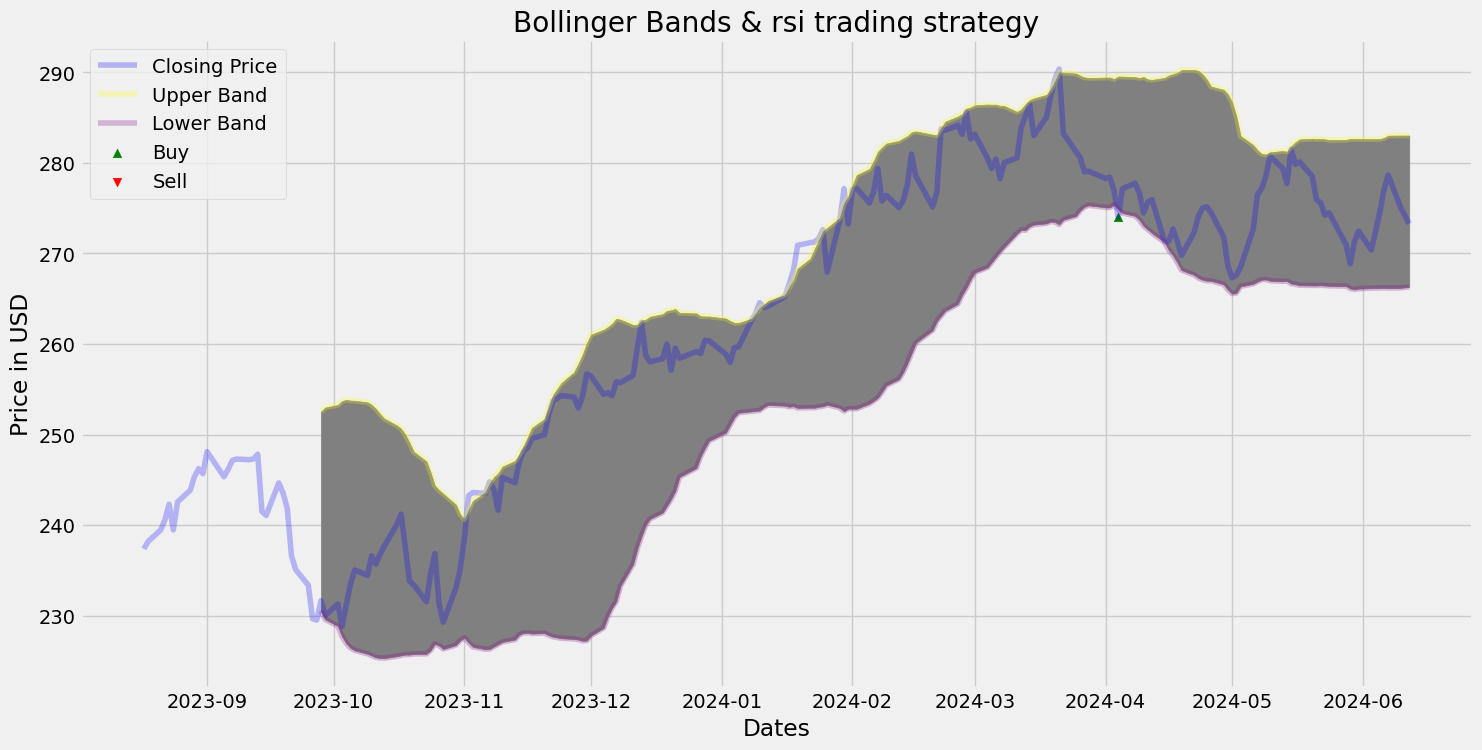

In [2]:
#This program uses the Bollinger Bands and RSP to determine when to buy and sell stocks
def bollingBandsRSI(ticket,days):
    import pandas as pd
    import numpy as np
    import yfinance as yf
    import matplotlib.pyplot as plt
    plt.style.use('fivethirtyeight')

    # Example usage
    ticker = "V"
    days = 300
    data = get_stock_data(ticker, days)

    #add Boolinger Bands to the dataset
    data = bollinger_bands(data)

    data = rsi(data)

    #impliment the trading stategy
    buy_price, sell_price = strategy(data)
    data['Buy'] = buy_price
    data['Sell'] = sell_price

    #Plot the close price, Bollinger Bands, and the trading signals
    fig, ax = plt.subplots(figsize = (16,8))
    plt.title('Bollinger Bands & rsi trading strategy')
    plt.ylabel('Price in USD')
    plt.xlabel('Dates')
    ax.plot(data['Close'], label= 'Closing Price', alpha = 0.25, color = 'blue')
    ax.plot(data['UpperBand'], label= 'Upper Band', alpha = 0.25, color = 'yellow')
    ax.plot(data['LowerBand'], label= 'Lower Band', alpha = 0.25, color = 'purple')
    ax.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='grey')
    ax.scatter(data.index, data['Buy'], label='Buy', alpha =1, marker= '^', color = 'green')
    ax.scatter(data.index, data['Sell'], label='Sell', alpha =1, marker= 'v', color = 'red')
    plt.legend()
    plt.show()

bollingBandsRSI('V', 300)